In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

- PowerCurve.csv is a worksheet having the device IDs of daily active users of each day of a month.

- Active_Users.csv is a worksheet having the weekly active users' (WAU)  that contains all device IDs that were active  in a particular week.

In [2]:
'''
excel1 = pd.read_excel("Active Users (1) (2).xlsx")
excel1.to_csv("Active_Users.csv", encoding='utf-8', index=False)

excel2 = pd.read_excel("PowerCurve-DAU_Device_ids (2) (1).xlsx")
excel2.to_csv("PowerCurve.csv", encoding='utf-8', index=False)
'''

'\nexcel1 = pd.read_excel("Active Users (1) (2).xlsx")\nexcel1.to_csv("Active_Users.csv", encoding=\'utf-8\', index=False)\n\nexcel2 = pd.read_excel("PowerCurve-DAU_Device_ids (2) (1).xlsx")\nexcel2.to_csv("PowerCurve.csv", encoding=\'utf-8\', index=False)\n'

In [3]:
df_activeU = pd.read_csv("Active_Users.csv")
df_activeU.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,w31,w32,w33,w34,w35,w36,w37,w38,w39,w40,w41,w42,w43,w44,w45,w46,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,839d5042ee4d8988,5109246885c54360,124bed219eafda9f,51f6c4c889cb71be,839d5042ee4d8988,191a909000d7123d,839d5042ee4d8988,31a0751a273226c0,191a909000d7123d,35d78153ec0ca97e,12a59aea3fe77a5f,191a909000d7123d,124bed219eafda9f,d6e21bdbae6d52bc,d41979e05b99805,ebf729078fe8dee8,a6137d1412146164,180866087d7dd708,d32e84f7bb1f9631,fc1c289ff4c82eae,a0b7467c6857475d,92db57a0aeb3ee8b,2d83793bcd0a55b9,b4e159960b1cc6e,ef892177dd321b8a,bfd2da1a0df8dda5,4c37523b384902e7,6b5a1ba54893478,7a2f9d51a3fe6d43,46c9a936f7358e71,509c82f847421070,ffe3f42c388ac838,fffd1689d69e4963,ffedb2a5b3b4838,fffd1689d69e4963,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,91e804eb002a580d,306243851b716bf6,821d85417c5745a9,821d85417c5745a9,27e142fe4c922f,124bed219eafda9f,821d85417c5745a9,185dba5eea76c25a,124bed219eafda9f,185dba5eea76c25a,185dba5eea76c25a,ec07876930bfd746,185dba5eea76c25a,124bed219eafda9f,ebe4ff79191258b,5ad60d644c47e44b,9d7dca508bc226d5,124bed219eafda9f,9a02bff438965bce,f536e5415399544,c2cd6c9714b58bd3,b4757c8b7ca5a942,e3fc9a1e129b7e21,70fc07695b2e1a24,559c18107a90c848,28639e5d189fa221,823001ae3d13c6cc,ae3f39e1cb8dcb0,29569ec1a59a885a,100bf6cc9d6f88e9,e68b1dc63598f60,ffddaebee5bece5e,ffedb2a5b3b4838,ffe3f42c388ac838,ffedb2a5b3b4838,ffe3d17a83edd05a,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,306243851b716bf6,a99a477e2c336bb9,306243851b716bf6,306243851b716bf6,821d85417c5745a9,821d85417c5745a9,5109246885c54360,65d1591bd2a6be03,821d85417c5745a9,92679583a8398662,108dc7288cc47571,185dba5eea76c25a,108dc7288cc47571,821d85417c5745a9,e24122826dc317ad,bd3708615c135c36,7d3615396e074a76,86a41d820c77aac1,9b2d519f1e265cbc,7c4855cc790bd0a8,6b39fa6bb7f2577d,16188f336f80c84e,99f090c11b920b19,5d8bb169394a17de,43917a92612a70d,88d1a7981cbeeacc,16cac72aff1a92ce,d787485ff575ab4a,ac641dad76123ef9,6823944d173d0ccd,431f0a93e5a2892f,ffd4835040fd7002,ffe3f42c388ac838,ffdce5869723d832,ffe3d17a83edd05a,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,d1afc6d7c4661d7e,d1afc6d7c4661d7e,a99a477e2c336bb9,a99a477e2c336bb9,306243851b716bf6,839d5042ee4d8988,306243851b716bf6,a99a477e2c336bb9,185dba5eea76c25a,a99a477e2c336bb9,92679583a8398662,92679583a8398662,92679583a8398662,108dc7288cc47571,dd09beba51187cdb,ad8e55c35ed8c52e,9a67ffb6ea7cf8bc,65fe43e73d5dc146,35f2e0d14ba9d15d,a6fd82affa490c48,4ff3f9933ee7684e,720d636c1c09cd04,d10e2d2b5e329fc0,7ec9cd7b2b472ba5,a86191db16bde7eb,dd4546cbba71249c,11f08da6ecae6293,ec92930a666cdef5,9947bd97fd590f86,709c20ba021a31a,1a0735379bc599fc,ffcbf697b45f1586,ffddaebee5bece5e,ffcbf697b45f1586,ffb36133fb3c44e2,ffb36133fb3c44e2,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa

In [4]:
df_activeU.shape

(4014, 56)

In [5]:
df_activeU.isnull().sum()

w1     2255
w2     2360
w3     2282
w4     1898
w5     1821
w6     1857
w7     1463
w8     1139
w9     1219
w10    1193
w11    1268
w12    1108
w13     934
w14     963
w15    1061
w16     948
w17     969
w18     915
w19     946
w20     912
w21    1023
w22     767
w23     820
w24     905
w25     913
w26     827
w27     829
w28     939
w29    1169
w30    1329
w31    1362
w32    1457
w33    1485
w34    1080
w35    1127
w36     833
w37     915
w38     613
w39     277
w40     268
w41       0
w42     566
w43     865
w44     796
w45     923
w46     431
w47     407
w48     192
w49     151
w50     260
w51     213
w52     246
w53     273
w54     105
w55     208
w56     318
dtype: int64

In [6]:
df_PCurve = pd.read_csv("PowerCurve.csv")
df_PCurve.head()

,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,2017-10-09,2017-10-10,2017-10-11,2017-10-12,2017-10-13,2017-10-14,2017-10-15,2017-10-16,2017-10-17,2017-10-18,2017-10-19,2017-10-20,2017-10-21,2017-10-22,2017-10-23,2017-10-24,2017-10-25,2017-10-26,2017-10-27,2017-10-28,2017-10-29,2017-10-30,2017-10-31
0,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,285020521074059,0036e6390a9e17b1,210521720553290
1,809648411450600060878848,001ee3d4fd0d1393,00a283e65135076e,001ee3d4fd0d1393,001ee3d4fd0d1393,00183d9b2185718e,00183d9b2185718e,00183d9b2185718e,3400079692024900096,001ee3d4fd0d1393,001ee3d4fd0d1393,001f310e1658e4c0,001ee3d4fd0d1393,001c1e62e423bc74,7128417570695999551137837426232948297535209128...,001f310e1658e4c0,00035cc291109b4d,87463922506848000,87463922506848000,87463922506848000,87463922506848000,2668002693824000,777708111208140,6564479795526000470005825420270908566451876685...,00183d9b2185718e,9805270173756200,946770812031453,87463922506848000,791104541223570,0075d7095f5747bf,285020521074059
2,001ee3d4fd0d1393,003e88d939e8e08c,00c7e013b900e087,002537a9182f4afd,0058339e87a02771,001ee3d4fd0d1393,001ee3d4fd0d1393,001ee3d4fd0d1393,001ca7d76f7d79ee,00637658298c8697,00637658298c8697,002537a9182f4afd,001f310e1658e4c0,001ee3d4fd0d1393,001f310e1658e4c0,004985c5898f4e5a,001f310e1658e4c0,001ee3d4fd0d1393,0036e6390a9e17b1,0086ca4569ddb275,001ee3d4fd0d1393,9003299644988999788100830086472234148586498080...,2668002693824000,0075d7095f5747bf,001ee3d4fd0d1393,7128417570695999551137837426232948297535209128...,8422464717280000400204331492864196952316009753...,001ee3d4fd0d1393,00183d9b2185718e,0080ca8989207f44,0045aea2ac6edb5a
3,0036e6390a9e17b1,0058339e87a02771,00d176adc3530e7a,007068741fbfb611,005f81093b87079e,005f81093b87079e,009197e411270447,0075d7095f5747bf,001ee3d4fd0d1393,0075d7095f5747bf,00a283e65135076e,00333c12e951d80f,005e82b46a140371,001f310e1658e4c0,0084734c5647a794,00637658298c8697,006a0e6289206391,00333c12e951d80f,0075d7095f5747bf,009197e411270447,005910532d8da2db,00035cc291109b4d,9003299644988999788100830086472234148586498080...,0080ca8989207f44,004e346b5919cc6e,00035cc291109b4d,00575aa68c6fa471,00708783608f9c75,001ee3d4fd0d1393,008a6268864a39c6,00575aa68c6fa471
4,006d67db40a6b9cb,005a39201eca94a6,00ee8ca909d29a0b,009197e411270447,00c5c32a8b4cf470,0083197a98ac8d3b,00c7e013b900e087,009197e411270447,005910532d8da2db,009bbc31d72e4fa8,00d176adc3530e7a,0058339e87a02771,0075d7095f5747bf,0058339e87a02771,009f4302a2ce732a,0075d7095f5747bf,0075d7095f5747bf,0036e6390a9e17b1,0084734c5647a794,009f4302a2ce732a,0075d7095f5747bf,001ca7d76f7d79ee,00035cc291109b4d,009197e411270447,005a39201eca94a6,00575aa68c6fa471,00637658298c8697,0075d7095f5747bf,006d67db40a6b9cb,009197e411270447,00a843d1fc13c7da


In [7]:
df_PCurve.shape

(9551, 31)

In [8]:
df_PCurve.isnull().sum()

2017-10-01    5187
2017-10-02    4195
2017-10-03    4357
2017-10-04    4157
2017-10-05    3967
2017-10-06    4335
2017-10-07    3605
2017-10-08    3511
2017-10-09    3563
2017-10-10    3542
2017-10-11    3719
2017-10-12    3300
2017-10-13    3716
2017-10-14    2863
2017-10-15    2684
2017-10-16    2297
2017-10-17    2246
2017-10-18    2133
2017-10-19    1727
2017-10-20    2998
2017-10-21    1369
2017-10-22    1552
2017-10-23    1611
2017-10-24    1234
2017-10-25    1667
2017-10-26    2766
2017-10-27    2722
2017-10-28    1053
2017-10-29     578
2017-10-30     181
2017-10-31       0
dtype: int64

### Power User Curve

In [9]:
PCurve_col = df_PCurve.columns

In [10]:
PCurve_col_val = []
size = df_PCurve.shape[0]

for _ in PCurve_col:
  no_notNull = size - df_PCurve[_].isnull().sum()
  PCurve_col_val.append(no_notNull)

In [11]:
growthR_val = []
growth = []

for i in range(len(PCurve_col_val)):
  if i == (len(PCurve_col_val)-1):
    break
  else:
    diff = PCurve_col_val[i+1]-PCurve_col_val[i]
    percent = (diff/PCurve_col_val[i])
    growth.append(diff)
    growthR_val.append(percent*100)


print("Average growth rate: ",round(np.mean(growthR_val),2),"%")

Average growth rate:  3.07 %


In [12]:
uniqueU = []
l = []

for _ in PCurve_col:
  l.append(list(df_PCurve[_]))
  for i in l:
    for k in i:
      uniqueU.append(k)

uniqueU = set(uniqueU) 
print("Number of Unique users during the period of 31 days: ",len(uniqueU))

Number of Unique users during the period of 31 days:  57302


In [13]:
print("Average number of active users during the period of 31 days: ",
      round(np.mean(PCurve_col_val),0))

Average number of active users during the period of 31 days:  6879.0


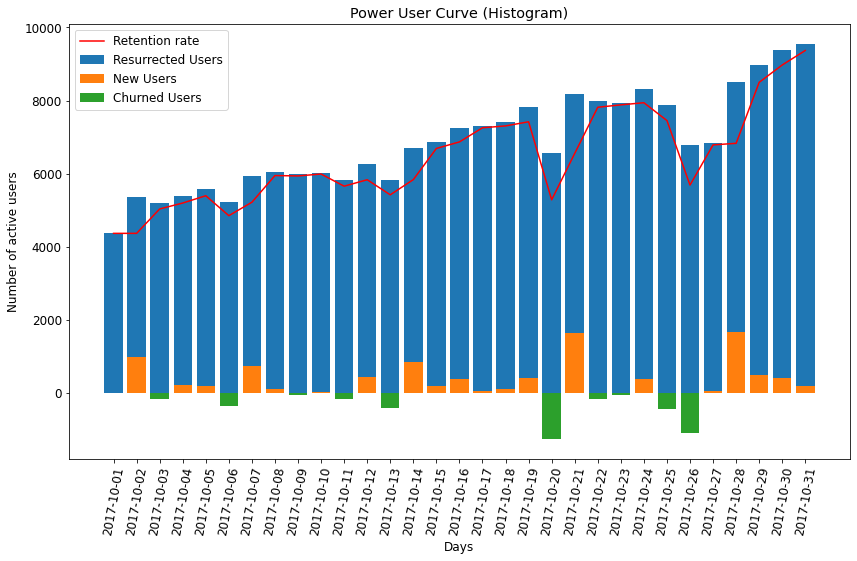

In [28]:
new_growth = [0,992,-162, 200, 190, -368, 730, 94, -52, 21, -177, 419, -416, 853, 179, 387,
              51, 113, 406,-1271, 1629, -183, -59, 377, -433, -1099, 44, 1669, 475, 397, 181]

new_users = [0,992,0, 200, 190, 0, 730, 94, 0, 21, 0, 419, 0, 853, 179, 387,
              51, 113, 406,0, 1629, 0, 0, 377, 0, 0, 44, 1669, 475, 397, 181]

churned = [0,0,-162, 0, 0, -368, 0, 0, -52, 0, -177, 0, -416, 0, 0, 0,
              0, 0, 0,-1271, 0, -183, -59, 0, -433, -1099, 0, 0, 0, 0, 0]

retentionR = np.array(PCurve_col_val) + np.array(churned) - np.array(new_users)

fig = plt.figure(figsize = (14, 8)) 
plt.bar(PCurve_col, PCurve_col_val, label="Resurrected Users")
plt.bar(PCurve_col,new_users, label="New Users" )
plt.bar(PCurve_col,churned, label="Churned Users")
plt.plot(retentionR, label="Retention rate",color="r",linewidth=1.5)
plt.xlabel("Days") 
#plt.xticks(ticks=activeU_col)
plt.xticks(rotation=80)
plt.ylabel("Number of active users") 
plt.title("Power User Curve (Histogram)")
plt.rcParams['font.size'] =12
plt.legend()
#plt.savefig('Power User Curve (Histogram).png')
plt.show()


In [15]:
print("Average number of new users: ", round((np.mean(new_users)),0))
print("Average number of churned users: ", round((np.mean(churned)),0))

Average number of new users:  303.0
Average number of churned users:  -136.0


#### Insights from the above plot
---
- Total number of Unique users during the period of 31 days:  57302, i.e 57.30K
- From day 1 to day 31, number of active users grow almost continuously
- Average growth rate:  3.07 %
- Day 1 has the least number of active users: 4364, i.e 4.36k
- Day 31 has the most number of active users: 9551, i.e 9.55K
- Average number of active users during the period of 31 days: 6879, i.e 6.87K
- Average number of new users: 303.0
- Average number of churned users: 136.0

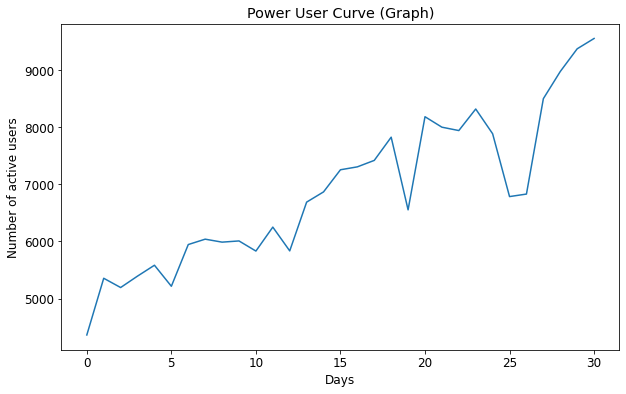

In [50]:
fig = plt.figure(figsize = (10, 6)) 
plt.plot( PCurve_col_val)
plt.xlabel("Days") 
#plt.xticks(ticks=activeU_col)
#plt.xticks(rotation=76)
plt.ylabel("Number of active users") 
plt.title("Power User Curve (Graph)")
#plt.savefig('Power User Curve (Graph).png')
plt.rcParams['font.size'] = 10
plt.show()

#### Active Users distribution among Day of Week

In [17]:
from datetime import date
import calendar

In [31]:
df_timestamp = pd.DataFrame()

In [32]:
df_timestamp['Timestamp'] = pd.to_datetime(df_PCurve.columns)

In [33]:
df_timestamp['Day of Week'] = df_timestamp['Timestamp'].dt.day_name()
df_timestamp['Active Users'] = PCurve_col_val

In [34]:
days = ['Tuesday','Monday','Sunday','Wednesday','Saturday','Thursday','Friday']
activeU_on_a_day = []

for _ in days:
  df = df_timestamp[df_timestamp['Day of Week'] == _]
  total = df['Active Users'].sum(axis=0)
  activeU_on_a_day.append(total)


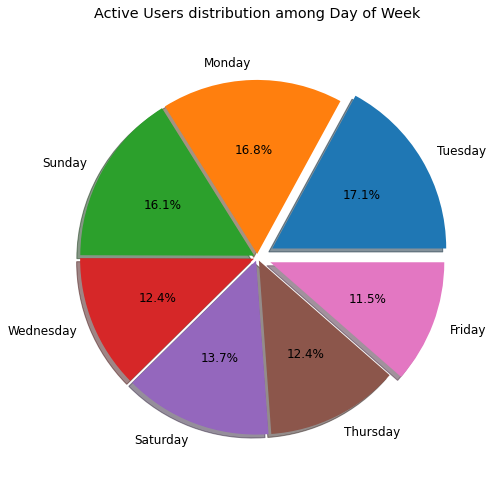

In [35]:
explode = (0.1,0.02,0.02,0.02,0.02,0.02,0.08)

fig = plt.figure(figsize =(10, 8)) 
plt.pie(activeU_on_a_day, labels = days, autopct='%1.1f%%', explode=explode, shadow=True )
plt.title("Active Users distribution among Day of Week\n")
#plt.savefig('Active Users distribution among Day of Week.png')
plt.rcParams['font.size'] = 16
plt.show() 

- Most number of users were active on Tuesdays
- Least number of users were active on Fridays
  - This could be due to the reason that most of the people prefer going out for parties and fun on friday nights
- Overall, number of users that were active during the weekdays is somewhat similar

---
Recommendations to lift the Power User Curve:

- Organise sales on Saturdays, Sundays, Mondays, and Tuesdays
  - Because from Saturday to Tuesday number of active users grow consistently
- Put on hoarding advertisements during the weekends when people prefer going out
  - So that they could be attracted to use the Mylo app

### Weekly Growth Accounting

In [36]:
activeU_col = df_activeU.columns

In [37]:
activeU_col_val = []
size = df_activeU.shape[0]

for _ in activeU_col:
  no_notNull = size - df_activeU[_].isnull().sum()
  activeU_col_val.append(no_notNull)

In [38]:
uniqueU = []
l = []

for _ in activeU_col:
  l.append(list(df_activeU[_]))
  for i in l:
    for k in i:
      uniqueU.append(k)

uniqueU = set(uniqueU) 
print("Total number of Unique users during the period of 51 weeks: ",len(uniqueU))

Total number of Unique users during the period of 51 weeks:  31825


In [39]:
print("Average number of active users during the period of 56 weeks: ",round(np.mean(activeU_col_val),0))

Average number of active users during the period of 56 weeks:  3078.0


In [40]:
growthR_val = []
growth = []

for i in range(len(activeU_col_val)):
  if i == (len(activeU_col_val)-1):
    break
  else:
    diff = activeU_col_val[i+1]-activeU_col_val[i]
    growth.append(diff)
    percent = (diff/activeU_col_val[i])
    growthR_val.append(percent*100)


print("Average growth rate: ",round(np.mean(growthR_val),2),"%")

Average growth rate:  1.58 %


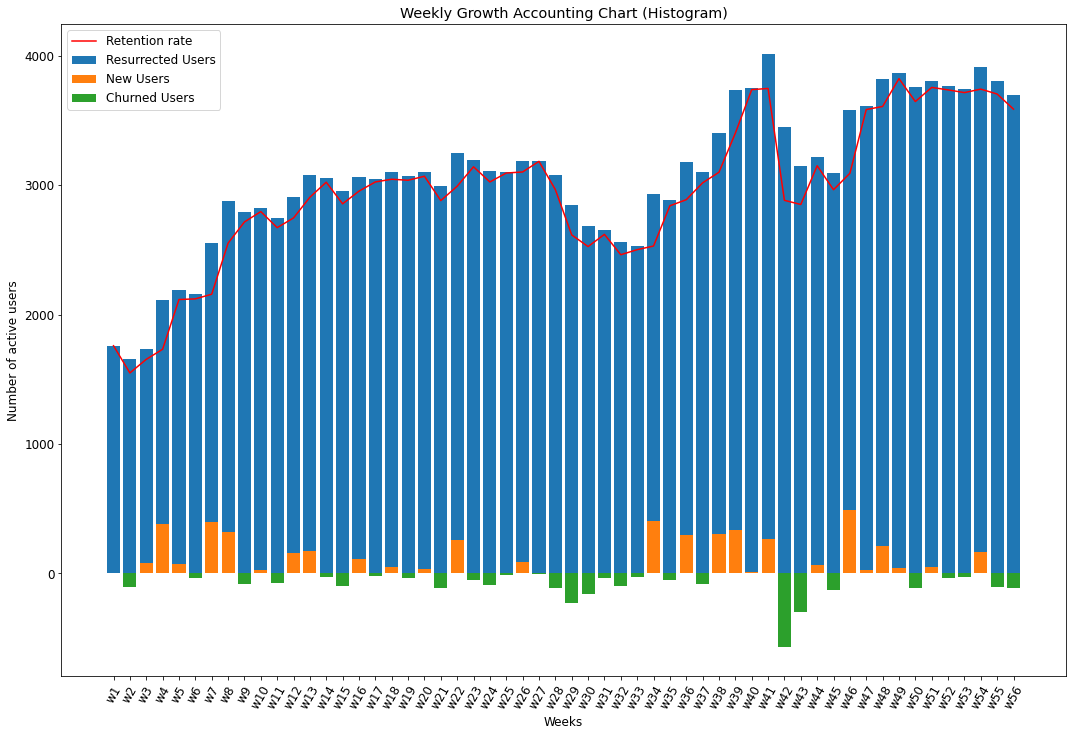

In [49]:
new_growth = [0,-105, 78, 384, 77, -36, 394, 324, -80, 26, -75, 160, 174, -29, -98, 113, -21, 54, -31,
              34, -111, 256, -53, -85, -8, 86, -2, -110, -230, -160, -33, -95, -28, 405, -47, 294, -82,
               302, 336, 9, 268, -566, -299, 69, -127, 492, 24, 215, 41, -109, 47, -33, -27, 168, -103,
               -110]

new_users = [0, 0, 78, 384, 77, 0, 394, 324, 0, 26, 0, 160, 174, 0, 0, 113, 0, 54, 0,
              34, 0, 256, 0, 0, 0, 86, 0, 0, 0, 0, 0, 0, 0, 405, 0, 294, 0,
               302, 336, 9, 268, 0, 0, 69, 0, 492, 24, 215, 41, 0, 47, 0, 0, 168, 0,
               0]

churned = [0,-105, 0, 0, 0, -36, 0, 0, -80, 0, -75, 0, 0, -29, -98, 0, -21, 0, -31,
              0, -111, 0, -53, -85, -8, 0, -2, -110, -230, -160, -33, -95, -28, 0, -47, 0, -82,
               0, 0, 0, 0, -566, -299, 0, -127, 0, 0, 0, 0, -109, 0, -33, -27, 0, -103,
               -110]

retentionR = np.array(activeU_col_val) + np.array(churned) - np.array(new_users)

fig = plt.figure(figsize = (18, 12)) 
plt.bar(activeU_col, activeU_col_val, label= "Resurrected Users")
plt.bar(activeU_col, new_users, label="New Users")
plt.bar(activeU_col, churned, label="Churned Users")
plt.plot(retentionR, label="Retention rate",color="r",linewidth=1.5 )
plt.xlabel("Weeks") 
#plt.xticks(ticks=activeU_col)
plt.xticks(rotation=60)
plt.ylabel("Number of active users") 
plt.title("Weekly Growth Accounting Chart (Histogram)")
plt.rcParams['font.size'] = 12
plt.legend()
#plt.savefig('Weekly Growth Accounting Chart (Histogram).png')
plt.show()

In [42]:
print("Average number of new users: ", round((np.mean(new_users)),0))
print("Average number of churned users: ", round((np.mean(churned)),0))

Average number of new users:  86.0
Average number of churned users:  -52.0


#### Insights from the above plot
---

- Total number of Unique users during the period of 56 weeks:  31825, i.e 31.82K
- Average number of active users during this period: 3078, i.e 3.07K
- Average growth rate:  1.58 %
- From Week 1 to Week 22, the number of active users grow almost consistently
- From Week 28 to Week 33, the number of active users fall consistently
- Week 2 has the least number of active users: 1654, i.e 1.65K
- Week 41 has the most number of active users: 4014, i.e 4.01K
- Average number of new users:  86.0
- Average number of churned users:  52.0


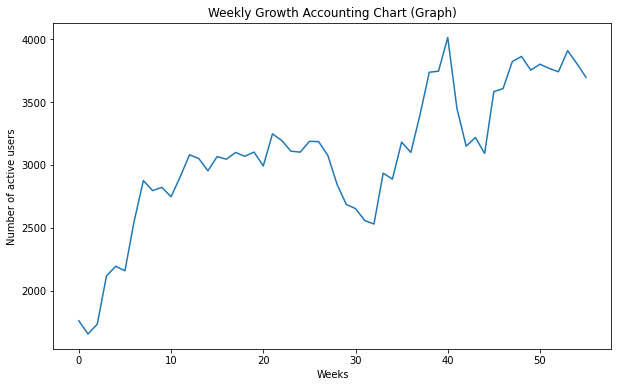

In [51]:
fig = plt.figure(figsize = (10, 6)) 
plt.plot(activeU_col_val)
plt.xlabel("Weeks") 
#plt.xticks(ticks=activeU_col)
#plt.xticks(rotation=60)
plt.ylabel("Number of active users") 
plt.title("Weekly Growth Accounting Chart (Graph)")
#plt.savefig('Weekly Growth Accounting Chart (Graph).png')
plt.rcParams['font.size'] = 10
plt.show()